In [44]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

#Periods
def show_Period_plot_interactive(MM,SUVT,plotts):
    from matplotlib.lines import Line2D
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore", message="Auto-removal of overlapping axes is deprecated")

    path = "./"
    files, rs =  "SP_RESULTS_", "results/"

    var = ['Low_Low',   'High_Low', 'Mod_Low','Mod_Mid','Low_High']
    fig, ax = plt.subplots(figsize=(18, 18), dpi=100)
    ax1 = plt.subplot2grid((5, 2), (1, 0), colspan=1)
    ax2 = plt.subplot2grid((5, 2), (1, 1), colspan=1)
    ax3 = plt.subplot2grid((5, 2), (2, 0), colspan=1)
    ax4 = plt.subplot2grid((5, 2), (2, 1), colspan=1)
    ax5 = plt.subplot2grid((5, 2), (3, 0), colspan=1)
    ax6 = plt.subplot2grid((5, 2), (3, 1), colspan=1)
    
    for SUV in SUVT:
        if SUV == "_SALVAGE_NPV":
            ls = "solid"
        else:
            ls = "--"
        colors = ["red","blue","green","black","orange"]
        for lm in plotts:
            t11 = pd.read_csv(path+rs+files+"unsolved_EF_INCOME_"+var[lm]+SUV+".csv")
            t11['EF_YEAR']=t11['EF_YEAR'].str[0:4]
            YR= [str(2016 + 5*i) for i in range(0,6)]
            t = [ax1,ax2,ax3,ax4,ax5,ax6]
            for i in range(0,6):
                t11.set_index("EF_YEAR").loc[YR[i]][["EF_AVG_NPV_unsolved_"+MM]].plot.kde(alpha = 0.5,ax=t[i],color=colors[lm],linestyle=ls)
                xmin1, xmax1 = t[i].get_xlim()
                cvar_5_11 = scoreatpercentile(t11.set_index("EF_YEAR").loc[YR[i]][["EF_AVG_NPV_unsolved_"+MM]], 5, interpolation_method='lower')

                t[i].plot([cvar_5_11],[0], marker = "^", color=colors[lm],markeredgecolor= "black",markersize=6)

                kde = gaussian_kde(t11.set_index("EF_YEAR").loc[YR[i]][["EF_AVG_NPV_unsolved_"+MM]]["EF_AVG_NPV_unsolved_"+MM])
                xmin, xmax= xmin1,xmax1

                # create points between the min and max
                x = np.linspace(xmin, xmax, 1000)

                # calculate the y values from the model
                kde_y = kde(x)

                # select x values below 0
                x0 = x[x < 200000]

                # get the len, which will be used for slicing the other arrays
                x0_len = len(x0)

                # slice the arrays
                y0 = kde_y[:x0_len]
                x1 = x[x0_len:]
                y1 = kde_y[x0_len:]

                # fill the areas
                if x0_len>1:
                    t[i].fill_between(x=x0, y1=y0, color=colors[lm], alpha=.5)
            titles =["1st Period Income","2nd Period Income","3rd Period Income","4th Period Income","5th Period Income","6th Period Income"]
            for i in range(0,6):
                t[i].get_legend().remove()
                t[i].set_title(titles[i])
    
    plt.show()

#NPV
def show_NPV_plot_interactive(MM,SUVT,plotts):
    from matplotlib.lines import Line2D
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    path = "./"
    files, rs, VARI =  "SP_RESULTS_", "results/", "MAX_AVG_NPV_unsolved_"

    var = ['Low_Low',   'High_Low', 'Mod_Low','Mod_Mid','Low_High']
    fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
    for SUV in SUVT:
        if SUV == "_SALVAGE_NPV":
            ls = "solid"
        else:
            ls = "--"
        colors = ["red","blue","green","black","orange"]

        for lm in plotts:
            t1 = pd.read_csv(path+rs+files+"unsolved_EF_"+var[lm]+SUV+".csv")
            t1[VARI+MM].plot.kde(ax= ax,alpha = 0.5,color = colors[lm],linestyle=ls)
            ax.set_title("Net Present Value")
            custom_lines = [(Line2D([0], [0], color=colors[i], lw=4)) for i in plotts]
            ax.plot([t1[VARI+MM].mean()],[0], marker = "x", color=colors[lm])
            ax.legend(custom_lines, [var[i] for i in plotts],bbox_to_anchor=(1.3, 1.0))
    ax.set_ylim(bottom=0)
    plt.show()

    
def show_GUI():
    Graph = show_NPV_plot_interactive
    # Create radio buttons for variable selection
    var_select = widgets.RadioButtons(
        options=["LL","HL","MM","ML","LH"],
        value='LL',
        description='Outcome scenario:',
        disabled=False
    )

    graph_select = widgets.RadioButtons(
        options=["Net Present Value","Periodic Income"],
        value='Net Present Value',
        description='Which variable to graph:',
        disabled=False
    )

    dictvar = {"LL":0,"HL":1,"MM":2,"ML":3,"LH":4}
    
    # Call the plot function when a new variable is selected
    
    def on_graph_change1(change):
        #print(f'Selected variable: {change.new}')
        clear_output()
        if change.new == "Net Present Value":
            Graph = show_NPV_plot_interactive
        else:
            Graph = show_Period_plot_interactive
        display(widgets.HBox([graph_select,widgets.VBox([OBJ_title, widgets.VBox(OBJboxes)]),var_select, widgets.VBox([checkboxes_title, widgets.VBox(checkboxes)])]))
        Graph(var_select.value,["_SALVAGE_"+i for i in [checkbox.description for checkbox in OBJboxes if checkbox.value]],[dictvar[i] for i in [checkbox.description for checkbox in checkboxes if checkbox.value]])

    graph_select.observe(on_graph_change1, 'value')
    
    def on_var_change1(change):
        #print(f'Selected variable: {change.new}')
        clear_output()
        display(widgets.HBox([graph_select,widgets.VBox([OBJ_title, widgets.VBox(OBJboxes)]),var_select, widgets.VBox([checkboxes_title, widgets.VBox(checkboxes)])]))
        Graph(change.new,["_SALVAGE_"+i for i in [checkbox.description for checkbox in OBJboxes if checkbox.value]],[dictvar[i] for i in [checkbox.description for checkbox in checkboxes if checkbox.value]])

    var_select.observe(on_var_change1, 'value')

    # Create the checkboxes for variable selection
    checkboxes = [widgets.Checkbox(description="LL",value = True), 
                  widgets.Checkbox(description="HL"), 
                  widgets.Checkbox(description="MM"),
                  widgets.Checkbox(description="ML"),
                  widgets.Checkbox(description="LH",value = True)]

    OBJboxes = [widgets.Checkbox(description="NPV",value = True), 
                  widgets.Checkbox(description="CVAR")]

    # Define the callback function for the checkboxes
    def on_checkbox_change(change):
        clear_output()
        variables = [dictvar[i] for i in [checkbox.description for checkbox in checkboxes if checkbox.value]]
        display(widgets.HBox([graph_select,widgets.VBox([OBJ_title, widgets.VBox(OBJboxes)]),var_select, widgets.VBox([checkboxes_title, widgets.VBox(checkboxes)])]))
        Graph(var_select.value,["_SALVAGE_"+i for i in [checkbox.description for checkbox in OBJboxes if checkbox.value]],variables)


    def on_OBJbox_change(change):
        clear_output()
        variables = ["_SALVAGE_"+i for i in [checkbox.description for checkbox in OBJboxes if checkbox.value]]
        display(widgets.HBox([graph_select,widgets.VBox([OBJ_title, widgets.VBox(OBJboxes)]),var_select, widgets.VBox([checkboxes_title, widgets.VBox(checkboxes)])]))
        Graph(var_select.value,variables,[dictvar[i] for i in [checkbox.description for checkbox in checkboxes if checkbox.value]])

    checkboxes_title = widgets.Label(value='Planned for scenarios:')
    OBJ_title=widgets.Label(value='Objectives:')
    # Attach the callback function to each checkbox
    for checkbox in checkboxes:
        checkbox.observe(on_checkbox_change, 'value')

    for checkbox in OBJboxes:
        checkbox.observe(on_OBJbox_change, 'value')    

    # Display the radio buttons, checkboxes and initial plot
    display(widgets.HBox([graph_select,widgets.VBox([OBJ_title, widgets.VBox(OBJboxes)]),var_select, widgets.VBox([checkboxes_title, widgets.VBox(checkboxes)])]))

    #plot_func(var_select.value)
    Graph(var_select.value,["_SALVAGE_"+i for i in [checkbox.description for checkbox in OBJboxes if checkbox.value]],[dictvar[i] for i in [checkbox.description for checkbox in checkboxes if checkbox.value]])


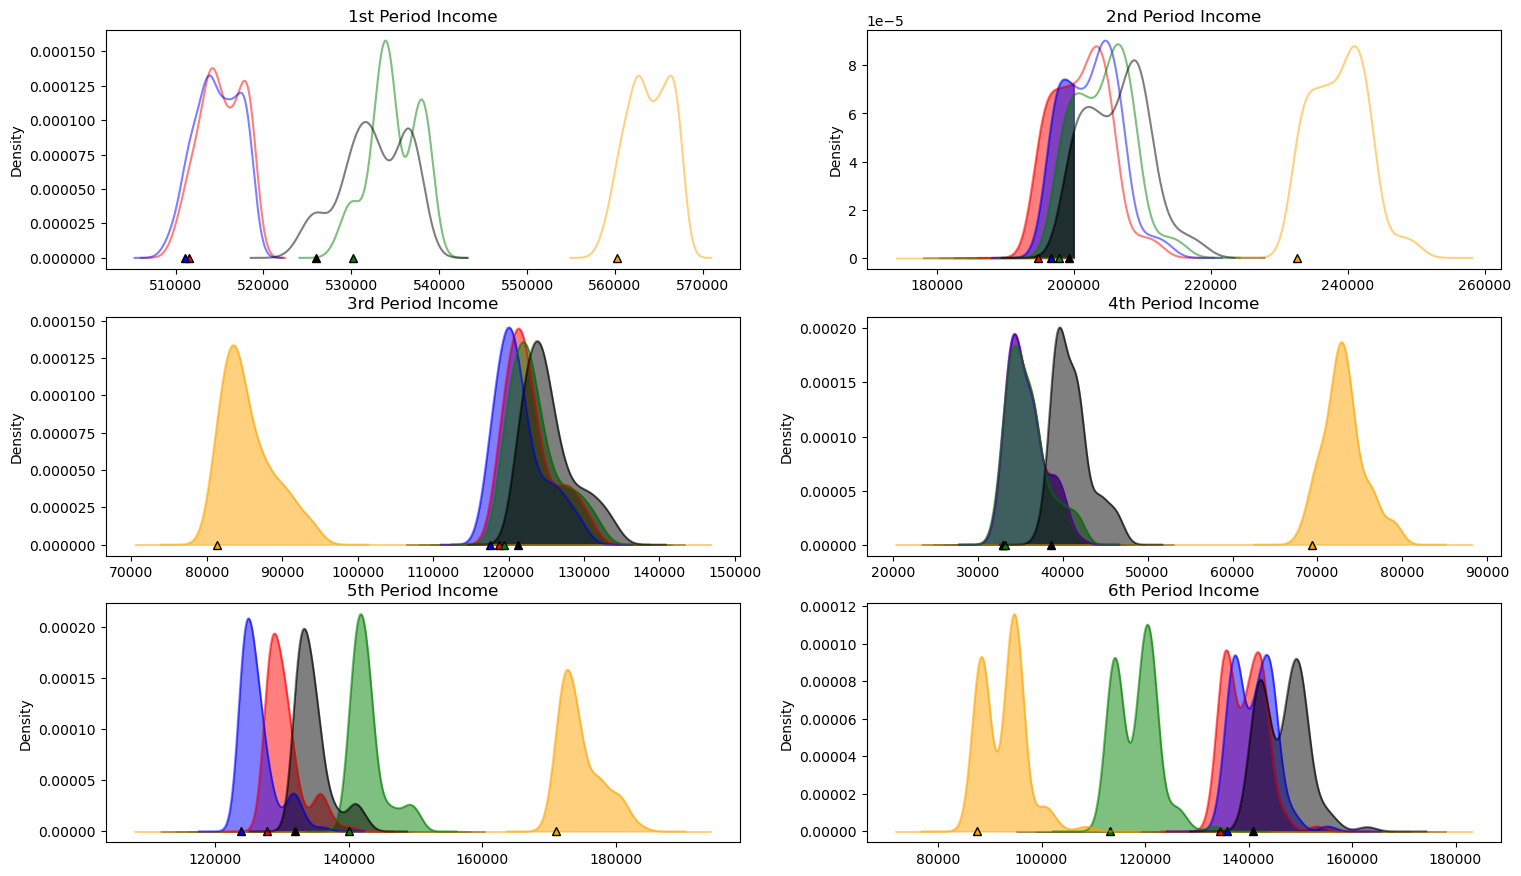

In [45]:
show_GUI()

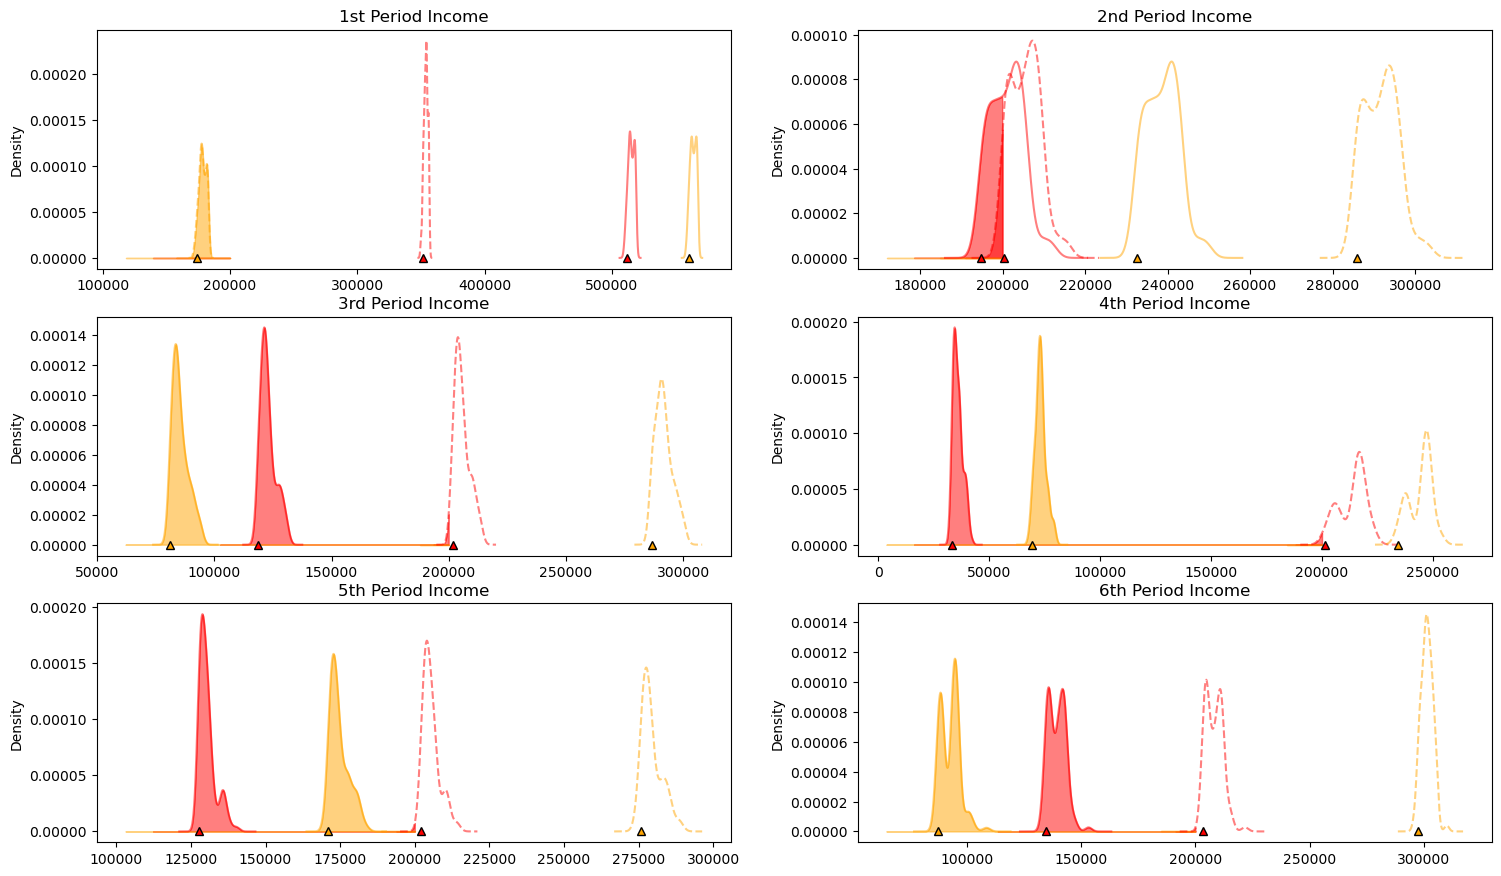

In [22]:
#Periods
def show_Period_plot_interactive(MM,SUVT,plotts):
    from matplotlib.lines import Line2D
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore", message="Auto-removal of overlapping axes is deprecated")

    path = "/users/keyvinds/Plan_RePlan/"
    files, rs =  "SP_RESULTS_", "results/"

    var = ['Low_Low',   'High_Low', 'Mod_Low','Mod_Mid','Low_High']
    fig, ax = plt.subplots(figsize=(18, 18), dpi=100)
    ax1 = plt.subplot2grid((5, 2), (1, 0), colspan=1)
    ax2 = plt.subplot2grid((5, 2), (1, 1), colspan=1)
    ax3 = plt.subplot2grid((5, 2), (2, 0), colspan=1)
    ax4 = plt.subplot2grid((5, 2), (2, 1), colspan=1)
    ax5 = plt.subplot2grid((5, 2), (3, 0), colspan=1)
    ax6 = plt.subplot2grid((5, 2), (3, 1), colspan=1)
    
    for SUV in SUVT:
        if SUV == "_SALVAGE_NPV":
            ls = "solid"
        else:
            ls = "--"
        colors = ["red","blue","green","black","orange"]
        for lm in plotts:
            t11 = pd.read_csv(path+rs+files+"unsolved_EF_INCOME_"+var[lm]+SUV+".csv")
            t11['EF_YEAR']=t11['EF_YEAR'].str[0:4]
            YR= [str(2016 + 5*i) for i in range(0,6)]
            t = [ax1,ax2,ax3,ax4,ax5,ax6]
            for i in range(0,6):
                t11.set_index("EF_YEAR").loc[YR[i]][["EF_AVG_NPV_unsolved_"+MM]].plot.kde(alpha = 0.5,ax=t[i],color=colors[lm],linestyle=ls)
                xmin1, xmax1 = t[i].get_xlim()
                cvar_5_11 = scoreatpercentile(t11.set_index("EF_YEAR").loc[YR[i]][["EF_AVG_NPV_unsolved_"+MM]], 5, interpolation_method='lower')

                t[i].plot([cvar_5_11],[0], marker = "^", color=colors[lm],markeredgecolor= "black",markersize=6)

                kde = gaussian_kde(t11.set_index("EF_YEAR").loc[YR[i]][["EF_AVG_NPV_unsolved_"+MM]]["EF_AVG_NPV_unsolved_"+MM])
                xmin, xmax= xmin1,xmax1

                # create points between the min and max
                x = np.linspace(xmin, xmax, 1000)

                # calculate the y values from the model
                kde_y = kde(x)

                # select x values below 0
                x0 = x[x < 200000]

                # get the len, which will be used for slicing the other arrays
                x0_len = len(x0)

                # slice the arrays
                y0 = kde_y[:x0_len]
                x1 = x[x0_len:]
                y1 = kde_y[x0_len:]

                # fill the areas
                if x0_len>1:
                    t[i].fill_between(x=x0, y1=y0, color=colors[lm], alpha=.5)
            titles =["1st Period Income","2nd Period Income","3rd Period Income","4th Period Income","5th Period Income","6th Period Income"]
            for i in range(0,6):
                t[i].get_legend().remove()
                t[i].set_title(titles[i])

show_Period_plot_interactive("HL",["_SALVAGE_CVAR","_SALVAGE_NPV"],[0,4])